In [29]:
import os
import json
import pandas as pd

In [30]:
# JSON 파일이 들어 있는 폴더 경로
folder_path = '피트니스자세/1.Training/라벨링데이터/맨몸운동_Labeling/Day01_200921_F/'

# 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(folder_path)

# JSON 파일만 필터링하여 처리
for file_name in file_list:
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            
            # 이제 data 변수에는 JSON 파일의 내용이 파싱된 데이터가 저장됩니다.
            # 각 JSON 파일에 대해 원하는 처리를 수행할 수 있습니다.


In [31]:
data

{'frames': [{'pts': {'Nose': {'x': -18.83887481689453,
     'y': 172.57679748535156,
     'z': 24.979169845581055},
    'Left Eye': {'x': -16.531145095825195,
     'y': 176.60659790039062,
     'z': 26.328083038330078},
    'Right Eye': {'x': -22.387670516967773,
     'y': 175.70181274414062,
     'z': 26.539770126342773},
    'Left Ear': {'x': -13.720301628112793,
     'y': 182.31060791015625,
     'z': 18.192453384399414},
    'Right Ear': {'x': -27.22574234008789,
     'y': 181.28543090820312,
     'z': 17.56881332397461},
    'Left Shoulder': {'x': 1.6671051979064941,
     'y': 171.576416015625,
     'z': 2.0586249828338623},
    'Right Shoulder': {'x': -36.467369079589844,
     'y': 164.77476501464844,
     'z': -1.1921157836914062},
    'Left Elbow': {'x': 12.662467956542969,
     'y': 143.76119995117188,
     'z': -3.38472580909729},
    'Right Elbow': {'x': -37.42909240722656,
     'y': 134.83450317382812,
     'z': -4.019511699676514},
    'Left Wrist': {'x': 14.52540969848632

In [32]:

# 데이터를 저장할 리스트 초기화
result_data = []

# 주어진 데이터를 원하는 형식으로 변환
for frame in data['frames']:
    pts_data = frame['pts']
    for part, coords in pts_data.items():
        result_data.append({
            'Part': part,
            'x': coords['x'],
            'y': coords['y'],
            'z': coords['z']
        })

# 데이터프레임 생성
df = pd.DataFrame(result_data)

# 최종 데이터프레임 출력
print(df)




           Part          x           y          z
0          Nose -18.838875  172.576797  24.979170
1      Left Eye -16.531145  176.606598  26.328083
2     Right Eye -22.387671  175.701813  26.539770
3      Left Ear -13.720302  182.310608  18.192453
4     Right Ear -27.225742  181.285431  17.568813
..          ...        ...         ...        ...
379  Right Palm -47.235081   22.934574  42.063889
380        Back  -1.674422   87.199631  21.878231
381       Waist   0.093237   95.467842   2.847874
382   Left Foot  19.866169   24.849798  -8.054808
383  Right Foot -18.485453   24.474068  -9.349943

[384 rows x 4 columns]


In [33]:
df[df['Part']=="Nose"]

,Part,x,y,z
0,Nose,-18.838875,172.576797,24.979170
24,Nose,-5.695539,136.188385,44.152729
48,Nose,1.409495,59.242714,65.556343
72,Nose,10.812838,32.208527,70.982315
96,Nose,0.543004,71.415504,45.158779
120,Nose,-7.711706,179.506317,19.497580
144,Nose,-0.923873,59.484051,44.903984
168,Nose,10.189567,37.239075,64.461525
192,Nose,0.959753,54.619820,51.264744
216,Nose,-4.776447,170.127350,32.042843


In [36]:
df["Part"].unique()

array(['Nose', 'Left Eye', 'Right Eye', 'Left Ear', 'Right Ear',
       'Left Shoulder', 'Right Shoulder', 'Left Elbow', 'Right Elbow',
       'Left Wrist', 'Right Wrist', 'Left Hip', 'Right Hip', 'Left Knee',
       'Right Knee', 'Left Ankle', 'Right Ankle', 'Neck', 'Left Palm',
       'Right Palm', 'Back', 'Waist', 'Left Foot', 'Right Foot'],
      dtype=object)

In [1]:
import json
import os
import glob

base_directory = '피트니스자세/1.Training/라벨링데이터/맨몸운동_Labeling'  # Replace with the path to the parent directory containing the 10 folders
combined_data = []

# Iterate through each folder
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)
    
    # Ensure it's a directory and not a file
    if os.path.isdir(folder_path):
        
        # List all .json files in the folder
        json_files = glob.glob(os.path.join(folder_path, '*.json'))

        for json_file in json_files:
            with open(json_file, 'r') as file:
                data = json.load(file)
                combined_data.append(data)  # or modify based on your specific needs

# Optionally, write combined data to a new JSON file
with open('combined_data.json', 'w') as output_file:
    json.dump(combined_data, output_file, indent=4)

KeyboardInterrupt: 

In [3]:

import os
import cv2
import mediapipe as mp
import pandas as pd

# 폴더 경로
folder_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A"

# CSV 파일 저장 경로
csv_path = "output.csv"

# mediapipe 초기화
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# CSV 파일에 저장할 데이터를 저장할 리스트
data_list = []

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        try:
            file_path = os.path.join(folder_path, filename)
            
            # 이미지 열기
            image = cv2.imread(file_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # 관절 추출
            results = hands.process(image_rgb)
            
            # 추출된 관절을 리스트로 저장
            if results.multi_hand_landmarks:
                for landmarks in results.multi_hand_landmarks:
                    landmarks_list = [landmark.x, landmark.y, landmark.z]
                    data_list.append(landmarks_list + [file_path])  # 파일 경로 추가
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

# 추출된 관절 데이터를 DataFrame으로 변환
df = pd.DataFrame(data_list, columns=["x", "y", "z", "file_path"])

# CSV 파일로 저장
df.to_csv(csv_path, index=False)

# mediapipe 세션 종료
hands.close()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
import os

# 폴더 경로
folder_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A"

# 이미지 파일 경로를 저장할 리스트
image_paths = []

# 폴더 내의 모든 파일에 대해 반복
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 파일이 .jpg 확장자를 가지고 있다면 리스트에 추가
    if filename.endswith(".jpg") and os.path.isfile(file_path):
        image_paths.append(file_path)

# 이미지 파일 경로를 출력
for image_path in image_paths:
    print(image_path)


/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000019.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000025.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000031.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000030.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000024.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000018.jpg
/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pe

In [5]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# 폴더 경로
folder_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A"

# CSV 파일 저장 경로
csv_path = "output.csv"

# mediapipe 초기화
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# CSV 파일에 저장할 데이터를 저장할 리스트
data_list = []

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        try:
            file_path = os.path.join(folder_path, filename)
            
            # 이미지 열기
            image = cv2.imread(file_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # 관절 추출
            results = hands.process(image_rgb)
            
            # 추출된 관절을 리스트로 저장
            if results.multi_hand_landmarks:
                for landmarks in results.multi_hand_landmarks:
                    landmarks_list = [landmark.x, landmark.y, landmark.z]
                    data_list.append(landmarks_list + [file_path])  # 파일 경로 추가
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

# 추출된 관절 데이터를 DataFrame으로 변환
df = pd.DataFrame(data_list, columns=["x", "y", "z", "file_path"])

# CSV 파일로 저장
df.to_csv(csv_path, index=False)

# mediapipe 세션 종료
hands.close()


In [21]:
import cv2
import mediapipe as mp

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"  # 이미지 파일 경로를 여기에 입력하세요.

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils  # mediapipe에서 그림 그리기 관련 유틸리티 임포트
mp_pose = mp.solutions.pose  # 포즈 인식 모듈 임포트

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make detection
    results = pose.process(image)

    # 이미지를 BGR 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

    # 이미지를 화면에 표시
    cv2.imshow('Mediapipe Feed', image)
    cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
    cv2.destroyAllWindows()  # 이미지 창을 닫습니다.


In [14]:
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
    results = pose.process(image)
    
    # DataFrame 생성 및 열 이름 지정
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])
    
    # 포즈 랜드마크를 DataFrame에 추가
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            row = [f"Landmark {idx}", landmark.x, landmark.y]
            df.loc[idx] = row

# DataFrame을 CSV 파일로 저장
csv_path = "pose_landmarks.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks saved to {csv_path}")

# 이미지를 화면에 표시
mp_drawing.draw_landmarks(
    image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
)

cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Pose landmarks saved to pose_landmarks.csv


In [17]:
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
    results = pose.process(image)
    
    # DataFrame 생성 및 랜드마크 이름 지정
    landmarks = [
        "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer", "Right Eye Inner", "Right Eye",
        "Right Eye Outer","Right Ankle", "Left Heel",
        "Right Heel", "Left Foot Index", "Right Foot Index"
    ]
    
    # 포즈 랜드마크를 DataFrame에 추가
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])
    
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            row = [landmarks[idx], landmark.x, landmark.y]
            df.loc[idx] = row

# DataFrame을 CSV 파일로 저장
csv_path = "pose_landmarks_1.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks saved to {csv_path}")

# 이미지를 화면에 표시
mp_drawing.draw_landmarks(
    image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
)

cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


IndexError: list index out of range

In [16]:
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
    results = pose.process(image)
    
    # 필요한 랜드마크 이름 지정
    selected_landmarks = ["Nose", "Left Eye", "Right Eye", "Left Shoulder", "Right Shoulder"]
    
    # 포즈 랜드마크를 DataFrame에 추가
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])
    
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            landmark_name = mp_pose.PoseLandmark(idx).name
            if landmark_name in selected_landmarks:
                row = [landmark_name, landmark.x, landmark.y]
                df.loc[idx] = row

# DataFrame을 CSV 파일로 저장
csv_path = "selected_pose_landmarks.csv"
df.to_csv(csv_path, index=False)
print(f"Selected pose landmarks saved to {csv_path}")


Selected pose landmarks saved to selected_pose_landmarks.csv


In [18]:
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
    results = pose.process(image)
    
    # DataFrame 생성 및 랜드마크 이름 지정
    landmarks = [
        "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer", "Right Eye Inner", "Right Eye",
        "Right Eye Outer", "Right Ankle", "Left Heel",
        "Right Heel", "Left Foot Index", "Right Foot Index"
    ]
    
    # 포즈 랜드마크를 DataFrame에 추가
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])
    
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            # landmarks 리스트의 길이와 랜드마크 개수를 비교하여 처리
            if idx < len(landmarks):  # 수정된 부분: 랜드마크 개수를 확인하여 추가
                row = [landmarks[idx], landmark.x, landmark.y]
                df.loc[idx] = row

# DataFrame을 CSV 파일로 저장
csv_path = "pose_landmarks_2.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks saved to {csv_path}")

# 이미지를 화면에 표시
mp_drawing.draw_landmarks(
    image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
)

cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Pose landmarks saved to pose_landmarks_2.csv


In [23]:
# 최종 / 이미지 색깔 이상함
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
    results = pose.process(image)
    
    # DataFrame 생성 및 랜드마크 이름 지정
    landmarks = [
        "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer", "Right Eye Inner", "Right Eye",
        "Right Eye Outer", "Left Ear", "Right Ear", "Mouth Left", "Mouth Right", "Left Shoulder",
        "Right Shoulder", "Left Elbow", "Right Elbow", "Left Wrist", "Right Wrist", "Left Pinky",
        "Right Pinky", "Left Index", "Right Index", "Left Thumb", "Right Thumb", "Left Hip",
        "Right Hip", "Left Knee", "Right Knee", "Left Ankle", "Right Ankle", "Left Heel",
        "Right Heel", "Left Foot Index", "Right Foot Index"
    ]
    
    # 포즈 랜드마크를 DataFrame에 추가
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])
    
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            row = [landmarks[idx], landmark.x, landmark.y]
            df.loc[idx] = row

    # 이미지를 화면에 표시
mp_drawing.draw_landmarks(
    image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
)

cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# DataFrame을 CSV 파일로 저장
csv_path = "pose_landmarks.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks saved to {csv_path}")

# # 이미지를 화면에 표시
# mp_drawing.draw_landmarks(
#     image,
#     results.pose_landmarks,
#     mp_pose.POSE_CONNECTIONS,
#     mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
#     mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
# )

# cv2.imshow('Mediapipe Feed', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Pose landmarks saved to pose_landmarks.csv


In [20]:
# 이미지 원본 출력
import cv2
import mediapipe as mp

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"  # 이미지 파일 경로를 여기에 입력하세요.

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils  # mediapipe에서 그림 그리기 관련 유틸리티 임포트
mp_pose = mp.solutions.pose  # 포즈 인식 모듈 임포트

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make detection
    results = pose.process(image)

    # 이미지를 BGR 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

    # 이미지를 화면에 표시
    cv2.imshow('Mediapipe Feed', image)
    cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
    cv2.destroyAllWindows()  # 이미지 창을 닫습니다.


In [24]:
import cv2
import mediapipe as mp
import pandas as pd

# 이미지 파일 경로 설정
image_path = "/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/001-1-1-01-Z1_A/001-1-1-01-Z1_A-0000001.jpg"  # 이미지 파일 경로를 여기에 입력하세요.

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 이미지 열기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mediapipe 포즈 인식을 위한 인스턴스 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 이미지를 RGB 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make detection
    results = pose.process(image)

    # 이미지를 BGR 색상 모드로 변환
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

    # 이미지를 화면에 표시
    cv2.imshow('Mediapipe Feed', image)
    cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.

    # 랜드마크 데이터를 저장할 빈 데이터프레임 생성
    df = pd.DataFrame(columns=["Landmark", "X", "Y"])

    # 랜드마크 데이터를 데이터프레임에 추가
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            # 랜드마크의 이름과 좌표를 데이터프레임에 추가
            row = [mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
            df.loc[idx] = row

    # DataFrame을 CSV 파일로 저장
    csv_path = "pose_landmarks_9.csv"
    df.to_csv(csv_path, index=False)
    print(f"Pose landmarks saved to {csv_path}")

    cv2.destroyAllWindows()  # 이미지 창을 닫습니다.


Pose landmarks saved to pose_landmarks_9.csv


In [25]:
df

,Landmark,X,Y
0,NOSE,0.490267,0.287820
1,LEFT_EYE_INNER,0.489699,0.274601
2,LEFT_EYE,0.489104,0.273560
3,LEFT_EYE_OUTER,0.488541,0.272493
4,RIGHT_EYE_INNER,0.489386,0.274634
5,RIGHT_EYE,0.488508,0.273770
6,RIGHT_EYE_OUTER,0.487566,0.272938
7,LEFT_EAR,0.479840,0.268919
8,RIGHT_EAR,0.478361,0.267951
9,MOUTH_LEFT,0.484983,0.295358


In [26]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Library/CloudStorage/GoogleDrive-pepesuk134@gmail.com/My Drive/fitness/Day01_200921_F/2/A/109-1-1-04-Z2_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 데이터프레임 생성
df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = [filename, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

# DataFrame을 CSV 파일로 저장
csv_path = "pose_landmarks_all_images.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks for all images saved to {csv_path}")


Pose landmarks for all images saved to pose_landmarks_all_images.csv


In [27]:
df

,Image_Name,Landmark,X,Y
0,109-1-1-04-Z2_A-0000003.jpg,NOSE,0.530891,0.314327
1,109-1-1-04-Z2_A-0000003.jpg,LEFT_EYE_INNER,0.531682,0.300893
2,109-1-1-04-Z2_A-0000003.jpg,LEFT_EYE,0.530783,0.299451
3,109-1-1-04-Z2_A-0000003.jpg,LEFT_EYE_OUTER,0.529787,0.297939
4,109-1-1-04-Z2_A-0000003.jpg,RIGHT_EYE_INNER,0.532688,0.300302
...,...,...,...,...
1051,109-1-1-04-Z2_A-0000026.jpg,RIGHT_ANKLE,0.471794,0.762533
1052,109-1-1-04-Z2_A-0000026.jpg,LEFT_HEEL,0.601636,0.772041
1053,109-1-1-04-Z2_A-0000026.jpg,RIGHT_HEEL,0.452727,0.773222
1054,109-1-1-04-Z2_A-0000026.jpg,LEFT_FOOT_INDEX,0.640288,0.763223


: 

# 플랭크 좌표 추출 (26)

In [1]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/553-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 데이터프레임 생성
df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

# # DataFrame을 CSV 파일로 저장
# csv_path = "plank.csv"
# df.to_csv(csv_path, index=False)
# print(f"Pose landmarks for all images saved to {csv_path}")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
df

,Image_Name,Landmark,X,Y
0,plank,NOSE,0.682250,0.608502
1,plank,LEFT_EYE_INNER,0.690108,0.602176
2,plank,LEFT_EYE,0.690755,0.598962
3,plank,LEFT_EYE_OUTER,0.691246,0.595750
4,plank,RIGHT_EYE_INNER,0.688285,0.607346
...,...,...,...,...
952,plank,RIGHT_ANKLE,0.410701,0.511220
953,plank,LEFT_HEEL,0.425691,0.487214
954,plank,RIGHT_HEEL,0.397714,0.510054
955,plank,LEFT_FOOT_INDEX,0.434887,0.554530


In [3]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/554-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [5]:
df[:33]

,Image_Name,Landmark,X,Y
0,plank,NOSE,0.682250,0.608502
1,plank,LEFT_EYE_INNER,0.690108,0.602176
2,plank,LEFT_EYE,0.690755,0.598962
3,plank,LEFT_EYE_OUTER,0.691246,0.595750
4,plank,RIGHT_EYE_INNER,0.688285,0.607346
5,plank,RIGHT_EYE,0.687682,0.607896
6,plank,RIGHT_EYE_OUTER,0.686895,0.608410
7,plank,LEFT_EAR,0.686337,0.578828
8,plank,RIGHT_EAR,0.680384,0.597511
9,plank,MOUTH_LEFT,0.674318,0.597403


In [7]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/555-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [8]:
df

,Image_Name,Landmark,X,Y
0,plank,NOSE,0.682250,0.608502
1,plank,LEFT_EYE_INNER,0.690108,0.602176
2,plank,LEFT_EYE,0.690755,0.598962
3,plank,LEFT_EYE_OUTER,0.691246,0.595750
4,plank,RIGHT_EYE_INNER,0.688285,0.607346
...,...,...,...,...
2899,plank,RIGHT_ANKLE,0.394857,0.501759
2900,plank,LEFT_HEEL,0.415670,0.509234
2901,plank,RIGHT_HEEL,0.388645,0.481948
2902,plank,LEFT_FOOT_INDEX,0.426361,0.572741


In [9]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/556-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

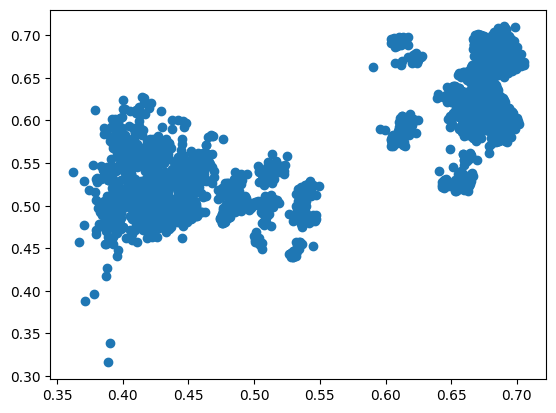

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['X'],df['Y'])

{'whiskers': [<matplotlib.lines.Line2D at 0x36b4b8100>,
 'caps': [<matplotlib.lines.Line2D at 0x36b4b8640>,
 'boxes': [<matplotlib.lines.Line2D at 0x36b49be50>],
 'medians': [<matplotlib.lines.Line2D at 0x36b4b8b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x36b4b8e20>],
 'means': []}

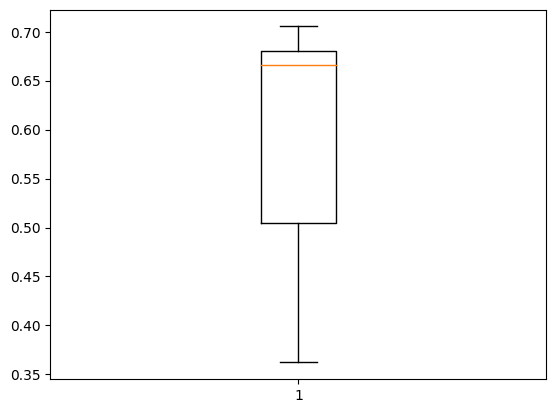

In [12]:
plt.boxplot(df['X'])

{'whiskers': [<matplotlib.lines.Line2D at 0x36b633d90>,
 'caps': [<matplotlib.lines.Line2D at 0x36b660310>,
 'boxes': [<matplotlib.lines.Line2D at 0x36b633af0>],
 'medians': [<matplotlib.lines.Line2D at 0x36b660850>],
 'fliers': [<matplotlib.lines.Line2D at 0x36b660af0>],
 'means': []}

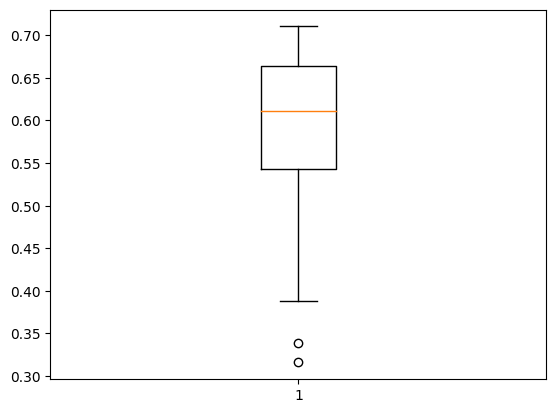

In [13]:
plt.boxplot(df['Y'])

In [14]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/557-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [15]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/558-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [16]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/559-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [17]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/560-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # 랜드마크 데이터를 데이터프레임에 추가
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
                    row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
                    df.loc[len(df)] = row

In [18]:
df

,Image_Name,Landmark,X,Y
0,plank,NOSE,0.682250,0.608502
1,plank,LEFT_EYE_INNER,0.690108,0.602176
2,plank,LEFT_EYE,0.690755,0.598962
3,plank,LEFT_EYE_OUTER,0.691246,0.595750
4,plank,RIGHT_EYE_INNER,0.688285,0.607346
...,...,...,...,...
7750,plank,RIGHT_ANKLE,0.400012,0.520345
7751,plank,LEFT_HEEL,0.409886,0.496718
7752,plank,RIGHT_HEEL,0.388454,0.501029
7753,plank,LEFT_FOOT_INDEX,0.414100,0.559747


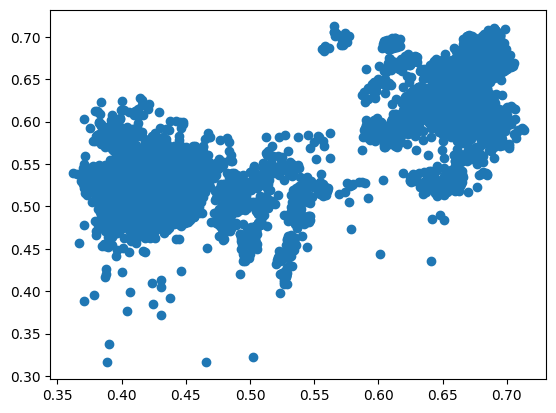

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['X'],df['Y'])

{'whiskers': [<matplotlib.lines.Line2D at 0x36d047070>,
 'caps': [<matplotlib.lines.Line2D at 0x36d045cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x36d047190>],
 'medians': [<matplotlib.lines.Line2D at 0x36d0461a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x36d046440>],
 'means': []}

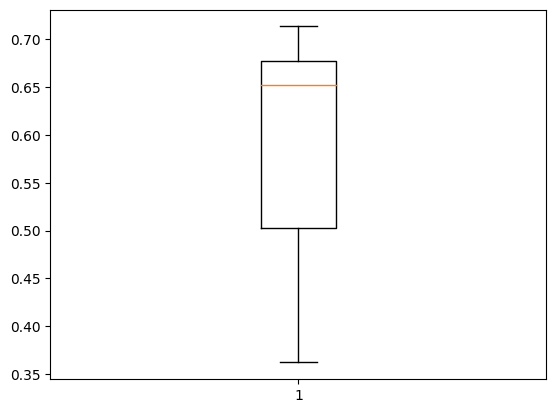

In [20]:
plt.boxplot(df['X'])

{'whiskers': [<matplotlib.lines.Line2D at 0x36b6df790>,
 'caps': [<matplotlib.lines.Line2D at 0x36b6dcfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x36b6307c0>],
 'medians': [<matplotlib.lines.Line2D at 0x36b6de470>],
 'fliers': [<matplotlib.lines.Line2D at 0x36b6dddb0>],
 'means': []}

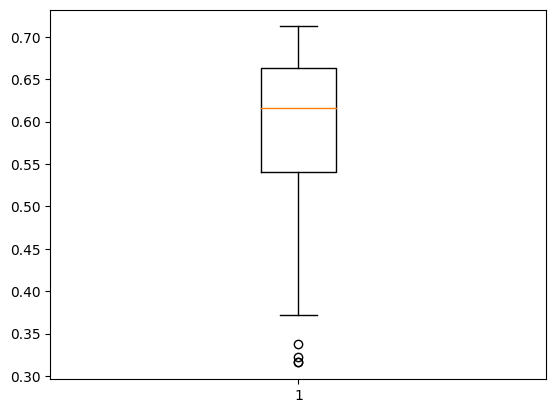

In [21]:
plt.boxplot(df['Y'])

In [23]:
# 폴더 경로 설정
folder_path = '/Users/gwon-yeonghyeon/Desktop/Day34_201106_F/1/A/557-1-2-26-Z37_A'

# mediapipe 초기화
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# # 데이터프레임 생성
# df = pd.DataFrame(columns=["Image_Name", "Landmark", "X", "Y"])

# 폴더 내의 모든 JPG 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 열기
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # mediapipe 포즈 인식을 위한 인스턴스 설정
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            # 이미지를 RGB 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Make detection
            results = pose.process(image)

            # 이미지를 BGR 색상 모드로 변환
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # 포즈 랜드마크를 시각화 -> 이미지에 렌더링
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            # 이미지를 화면에 표시
            cv2.imshow('Mediapipe Feed', image)
            cv2.waitKey(0)  # 이미지 창을 열어둔 상태에서 키 입력을 대기합니다.
            cv2.destroyAllWindows()  # 이미지 창을 닫습니다.

            # # 랜드마크 데이터를 데이터프레임에 추가
            # if results.pose_landmarks:
            #     for idx, landmark in enumerate(results.pose_landmarks.landmark):
            #         # 랜드마크의 이름, 좌표, 이미지 이름을 데이터프레임에 추가
            #         row = ['plank', mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y]
            #         df.loc[len(df)] = row

In [24]:
# DataFrame을 CSV 파일로 저장
csv_path = "plank.csv"
df.to_csv(csv_path, index=False)
print(f"Pose landmarks for all images saved to {csv_path}")

Pose landmarks for all images saved to plank.csv
